## Problem 1

对图片进行三通道的svd分解，并绘制主元数k和近似误差的曲线图

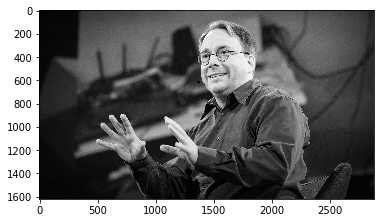

In [1]:
# 导入图片
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
plt.imshow(r, cmap='gray')


In [2]:
# 求approximation error，ppt没有给出，这里采用MSE
import operator
import numpy as np
def cmp_err(approx_img, real_img):
    assert operator.eq(approx_img.shape, real_img.shape)
    return np.mean((approx_img-real_img)**2)



In [3]:
# 绘图
def plotting(k_set, error_set):
    assert len(k_set) == len(error_set)
    plt.figure(figsize=(12, 8))
    plt.xticks(range(1, len(k_set)+1), k_set)
    plt.plot(range(1, len(error_set)+1), error_set, 'b')
    plt.xlabel("k")
    plt.ylabel("MSE loss")
    plt.show()


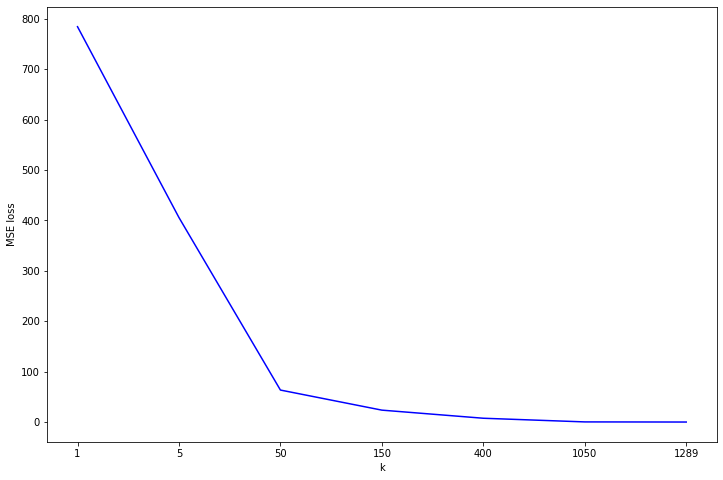

In [4]:
# 做svd分解
USVset = []
for c in [r,g,b]:
    U, S, V = np.linalg.svd(c, full_matrices=False)
    USVset.append([U,S,V])

k_set = (1,5,50,150,400,1050,1289)
error_set = []
approx_img = np.zeros(img.shape)
for k in k_set:
    for i,c in enumerate([r,g,b]):
        U,S,V = USVset[i]
        #压缩的通道
        approx_c = np.matmul(np.matmul(U[:,:k+1], np.diag(S)[:k+1,:k+1]), V[:k+1,:])
        #压缩的图片
        approx_img[:,:,i] = approx_c
    err =  cmp_err(approx_img, img)
    error_set.append(err)

plotting(k_set, error_set)

    


## Problem 2
分析r通道的rank

In [5]:
print(USVset[0][1].shape)

(1620,)


课堂中已经讲过了，rank(r) = rank(r_S)，所以rank(r)=1620

## Problem 3

绘制g通道的A1,A2,A3,A4,A5和他们的和（Ai定义见ppt第六页）

In [6]:
# 计算ai
g_U, g_S, g_V = USVset[2]
def get_ai(i):
    return g_S[i] * np.matmul(g_U[:,i].reshape((g_U.shape[0],1)), g_V[i,:].reshape((1,g_V.shape[1])))


In [7]:
g_U[:, i].reshape(g_U.shape[0],1).shape

(1620, 1)

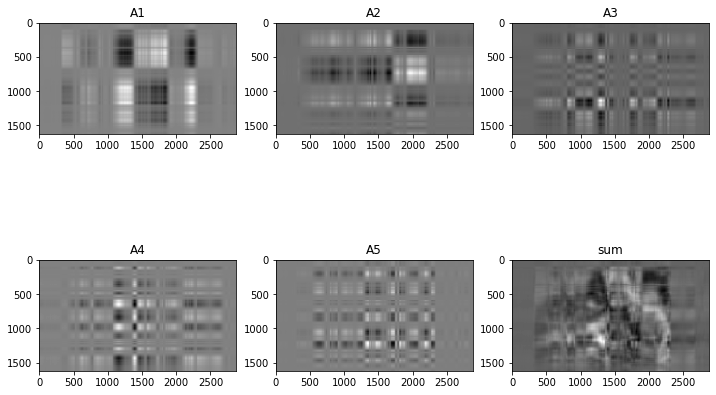

In [8]:
# 绘制A1,A2,A3,A4,A5和他们的和
plt.figure(figsize=(12, 8))
sum = np.zeros(g.shape)
for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i*3+j+1)
        if i*3+j+1<6:
            ai = get_ai(i*3+j+1)
            plt.title("A"+str(i*3+j+1))
            plt.imshow(ai, cmap='gray')
            sum += ai
        else:
            plt.title("sum")
            plt.imshow(sum, cmap='gray')
